# Flight Price Prediction

**Importing necessary libraries**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataSets_ML/flight_data.csv')

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

**Check for null values**

In [ ]:

df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.dropna(inplace = True)  # there are only 2 missing values and both are in same row, so we can drop that row

In [ ]:
df.shape

(10682, 11)

In [ ]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


## Exploratory Data Analysis

From description we can see that 'Date_of_Journey' is an object data type, Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.

 **to_datetime** function convert object data type to datetime dtype.

.dt.day method will extract only day of that date

.dt.month method will extract only month of that date

In [ ]:
df["Journey_day"] = pd.to_datetime(df["Date_of_Journey"],format="%d-%m-%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"],format = "%d-%m-%Y").dt.month

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [ ]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df['Arrival_Time']).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df['Arrival_Time']).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
# Splitting 'Duration' column to 2 separate columns with hours and minutes


# Assigning and converting Duration column into list
duration = list(df["Duration"])     #['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m',........]



for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i] + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split("h")[0]))                    # Extract hours from duration
    duration_mins.append(int(duration[i].split("m")[0].split()[-1]))   # Extracts only minutes from duration

# duration[0].split()       # ['2h', '50m']
# duration[0].split('h')    # ['2', ' 50m'] # delimiter='h' (splits at occurence of 'h')
# duration[0].split('h')[0] # '2'
# duration[0].split('m')    #['2h 50', '']
# duration[0].split('m')[0]   #'2h 50'
# duration[0].split('m')[0].split()[-1] # '50'

In [ ]:
# Adding duration_hours and duration_mins list to  dataframe df
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [ ]:
df.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Data Visualization

 The below **barplot** shows the variations in Price in accordance with Airlines

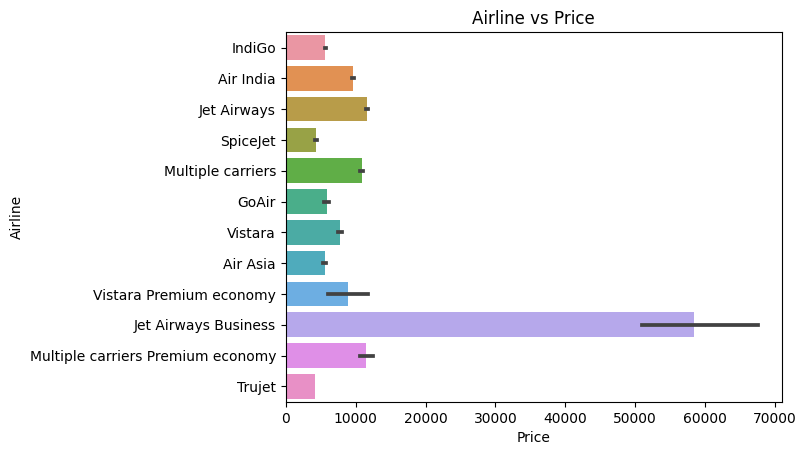

In [ ]:
plt.title('Airline vs Price')
sns.barplot(x='Price',y='Airline',data=df)
plt.show()

 The below **countplot** shows the count of flights in accordance with airlines

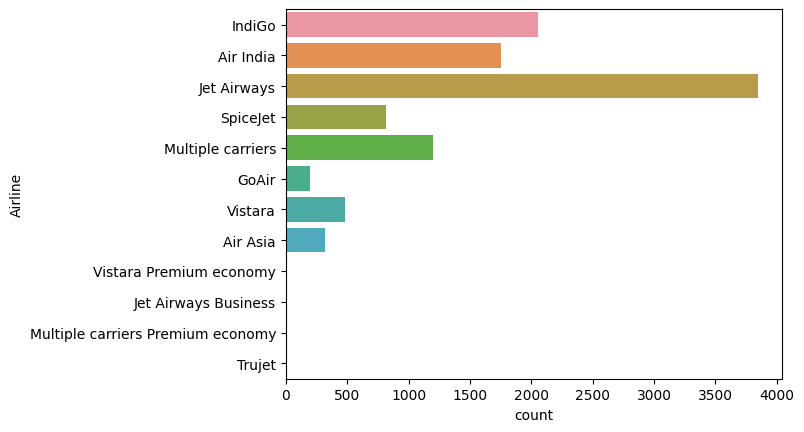

In [ ]:
sns.countplot(y='Airline',data=df)
plt.show()

 The below **box plot** shows the distribution of Price with respect to Source of flight

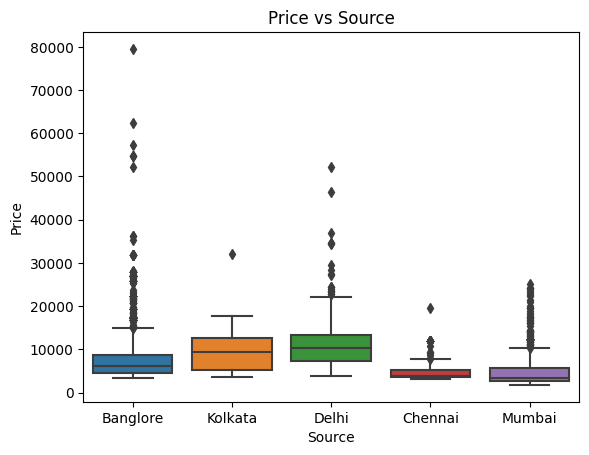

In [ ]:
plt.title('Price vs Source')
sns.boxplot(x='Source',y='Price',data=df)
plt.show()

 **seaborn**.**catplot( )** method is used to plot categorical plots.

With the use this function, we can illustrate the connection between numerical data and one or more category variables.

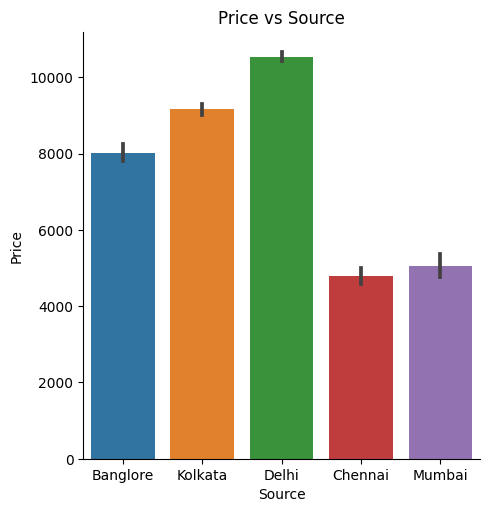

In [ ]:
sns.catplot(y="Price",x ="Source",data = df,kind='bar')
plt.title('Price vs Source')
plt.show()

The below **heatmap** displays correlation between independent and dependent variables

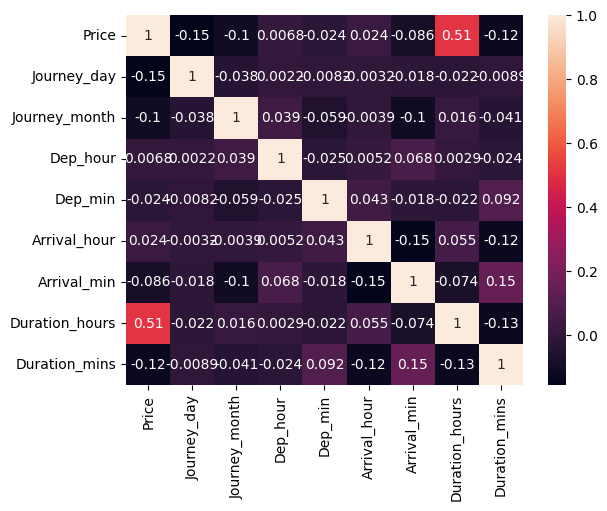

<Figure size 2500x1800 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(), annot = True)
plt.figure(figsize =(25,18))
plt.show()

**Handling Categorical Data**


In [ ]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [ ]:
# As Airline is nominal categorical data we will perform get_dummies() function

Airline = pd.get_dummies(df[["Airline"]],drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [ ]:
# As Source is also a nominal categorical data we will perform get_dummies

Source = pd.get_dummies(df[["Source"]],drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [ ]:
Destination = pd.get_dummies(df[["Destination"]],drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
df['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [ ]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [ ]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"],axis=1,inplace=True)

In [ ]:
# As this is case of ordinal categorical type we can perform LabelEncoder or we can use map() function

df['Total_Stops']=df['Total_Stops'].map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [ ]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
# Concatenate dataframe --> data_df + Airline + Source + Destination

df=pd.concat([df, Airline, Source, Destination],axis = 1)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [ ]:
df.shape

(10682, 30)

In [ ]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=df.drop(['Price'],axis=1,inplace=True)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = df.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

 **Scaling**

In [ ]:
sc=MinMaxScaler()
X=sc.fit_transform(X)
X

array([[0.        , 0.88461538, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.30769231, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.30769231, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

**Splitting train and test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

**Creating models with 5 Regression algorithms**

In [ ]:
rf = RandomForestRegressor()
lr=LinearRegression()
sv=SVR()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
models=[rf,lr,sv,ab,gb]

for model in models:
  print('*'*20,model,'*'*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('r2_score:',r2_score(y_test,y_pred))
  print('MAE:',mean_absolute_error(y_test,y_pred))
  print('MSE:',mean_squared_error(y_test,y_pred))
  print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
  print('_'*100)

******************** RandomForestRegressor() ********************
r2_score: 0.8091883684439745
MAE: 1181.9372619326766
MSE: 3773682.6261786646
RMSE: 1942.5968769095314
____________________________________________________________________________________________________
******************** LinearRegression() ********************
r2_score: 0.6115426861783846
MAE: 1945.366146645866
MSE: 7682522.3086583465
RMSE: 2771.7363346210163
____________________________________________________________________________________________________
******************** SVR() ********************
r2_score: 0.051537201417553136
MAE: 3363.3901447927256
MSE: 18757753.68304243
RMSE: 4331.022244579498
____________________________________________________________________________________________________
******************** AdaBoostRegressor() ********************
r2_score: 0.03569888549654043
MAE: 3633.302414431016
MSE: 19070988.13909552
RMSE: 4367.03424981938
________________________________________________________

In [ ]:
# Creating a new dataset to compare the r2 scores of each models
d={'Model':['Random Forest Regressor','Linear Regression','Support Vector Regressor','AdaBoost Regressor','Gradient Boosting Regressor'],'R2 Score':[0.8091,0.6115,0.0515,0.0357,0.7647]}
df_new=pd.DataFrame(d,index=[1,2,3,4,5],columns=['Model','R2 Score'])
df_new.style.highlight_max(subset=['R2 Score'],color='green')

,Model,R2 Score
1,Random Forest Regressor,0.809100
2,Linear Regression,0.611500
3,Support Vector Regressor,0.051500
4,AdaBoost Regressor,0.035700
5,Gradient Boosting Regressor,0.764700


Highest r2_score for **Random Forest Regressor**

**Hyper parameter tuning** - to find the best parameters of RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [i for i in range(100,1000,100)],    # Number of trees in random forest
               'max_features':['auto', 'sqrt'],                # Number of features to consider at every split
               'max_depth': [5,10,15,20],                      # Maximum number of levels in tree
               'min_samples_split': [2, 5, 10, 15],            # Minimum number of samples required to split a node
               'min_samples_leaf': [1, 2, 5, 10]}              # Minimum number of samples required at each leaf node

hp=RandomizedSearchCV(estimator=rf,param_distributions=params,scoring='r2',n_iter=10,cv=5,random_state=2)
hp.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900]},
                   random_state=2, scoring='r2')

In [ ]:
hp.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [ ]:
#Creating new RandomForestRegression model based on best parameters

rf1 = RandomForestRegressor(n_estimators=300,min_samples_split=5,min_samples_leaf=1,max_features='auto',max_depth= 15,random_state=1)
rf1.fit(X_train,y_train)
y_pred1=rf1.predict(X_test)
print('r2_score:',r2_score(y_test,y_pred1))
print('MAE:',mean_absolute_error(y_test,y_pred1))
print('MSE:',mean_squared_error(y_test,y_pred1))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred1)))

r2_score: 0.8280837066545403
MAE: 1151.6440306991346
MSE: 3399989.4244618397
RMSE: 1843.906023760929


**After hyperparameter tuning, r2_score increased to** **82.80**

 Below **distplot()** displays the density distribution of the predicted price values

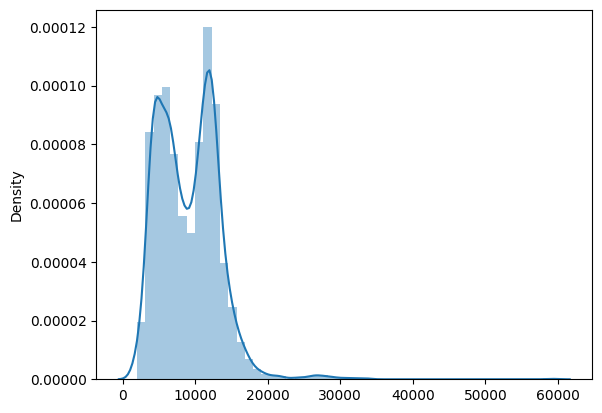

In [ ]:
sns.distplot(y_pred1)
plt.show()

Below **histplot(**) displays the count of observations of predicted price values

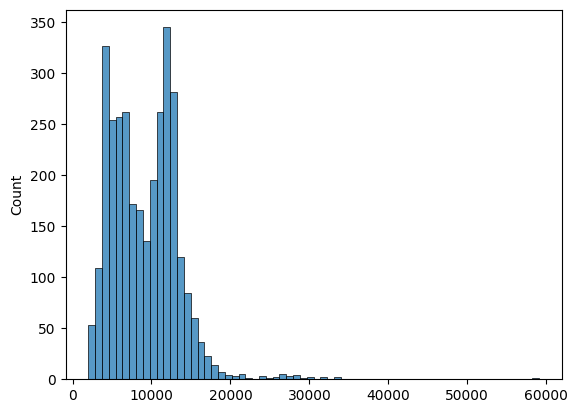

In [ ]:
sns.histplot(y_pred1)
plt.show()

Below **scatter plot** represent the relationship between Predicted Price and Actual Price

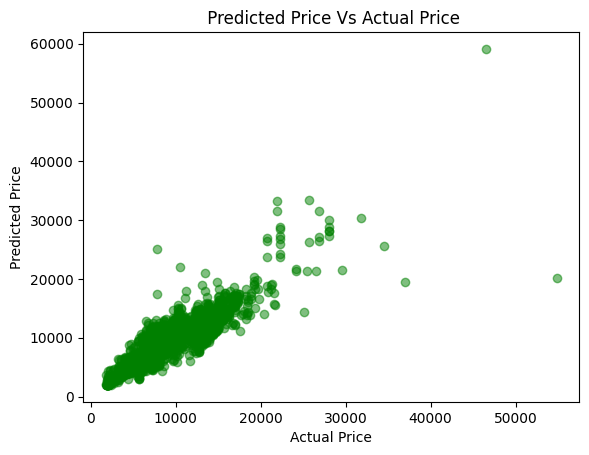

In [ ]:
plt.title(" Predicted Price Vs Actual Price")
plt.scatter(y_test, y_pred1,color='green',alpha=0.5)  # alpha adjusts transparency
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Save the model to reuse it again**

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf1, file)


In [ ]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [ ]:
y_prediction = forest.predict(X_test)

In [ ]:
r2_score(y_test,y_prediction)

0.8280837066545403